In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pheno1, pheno2 = "abundance", "surface2"

df = pd.read_csv(f"../data/kir21/kir21_effect_{pheno1}_{pheno2}.csv")

In [ ]:
from cosmos import DMSData, PriorFactory, ModelBuilder, ModelAnalyzer

data_obj = DMSData(
    df,
    [pheno1, pheno2],
    include_type=["missense"],
    exclude_type=[
        "synonymous",
        "insertion1",
        "insertion2",
        "insertion3",
        "deletion1",
        "deletion2",
        "deletion3",
    ],
    min_num_variants_per_group=10,
)
prior = PriorFactory(
    data_obj,
    x_name="beta_hat_1",
    y_name="beta_hat_2",
    x_se_name="se_hat_1",
    x_gmm_n_components=2,
)
model = ModelBuilder(prior, f"results/{pheno1}_{pheno2}/")

In [5]:
analyzer = ModelAnalyzer(model, f"results/{pheno1}_{pheno2}/analysis/", False)

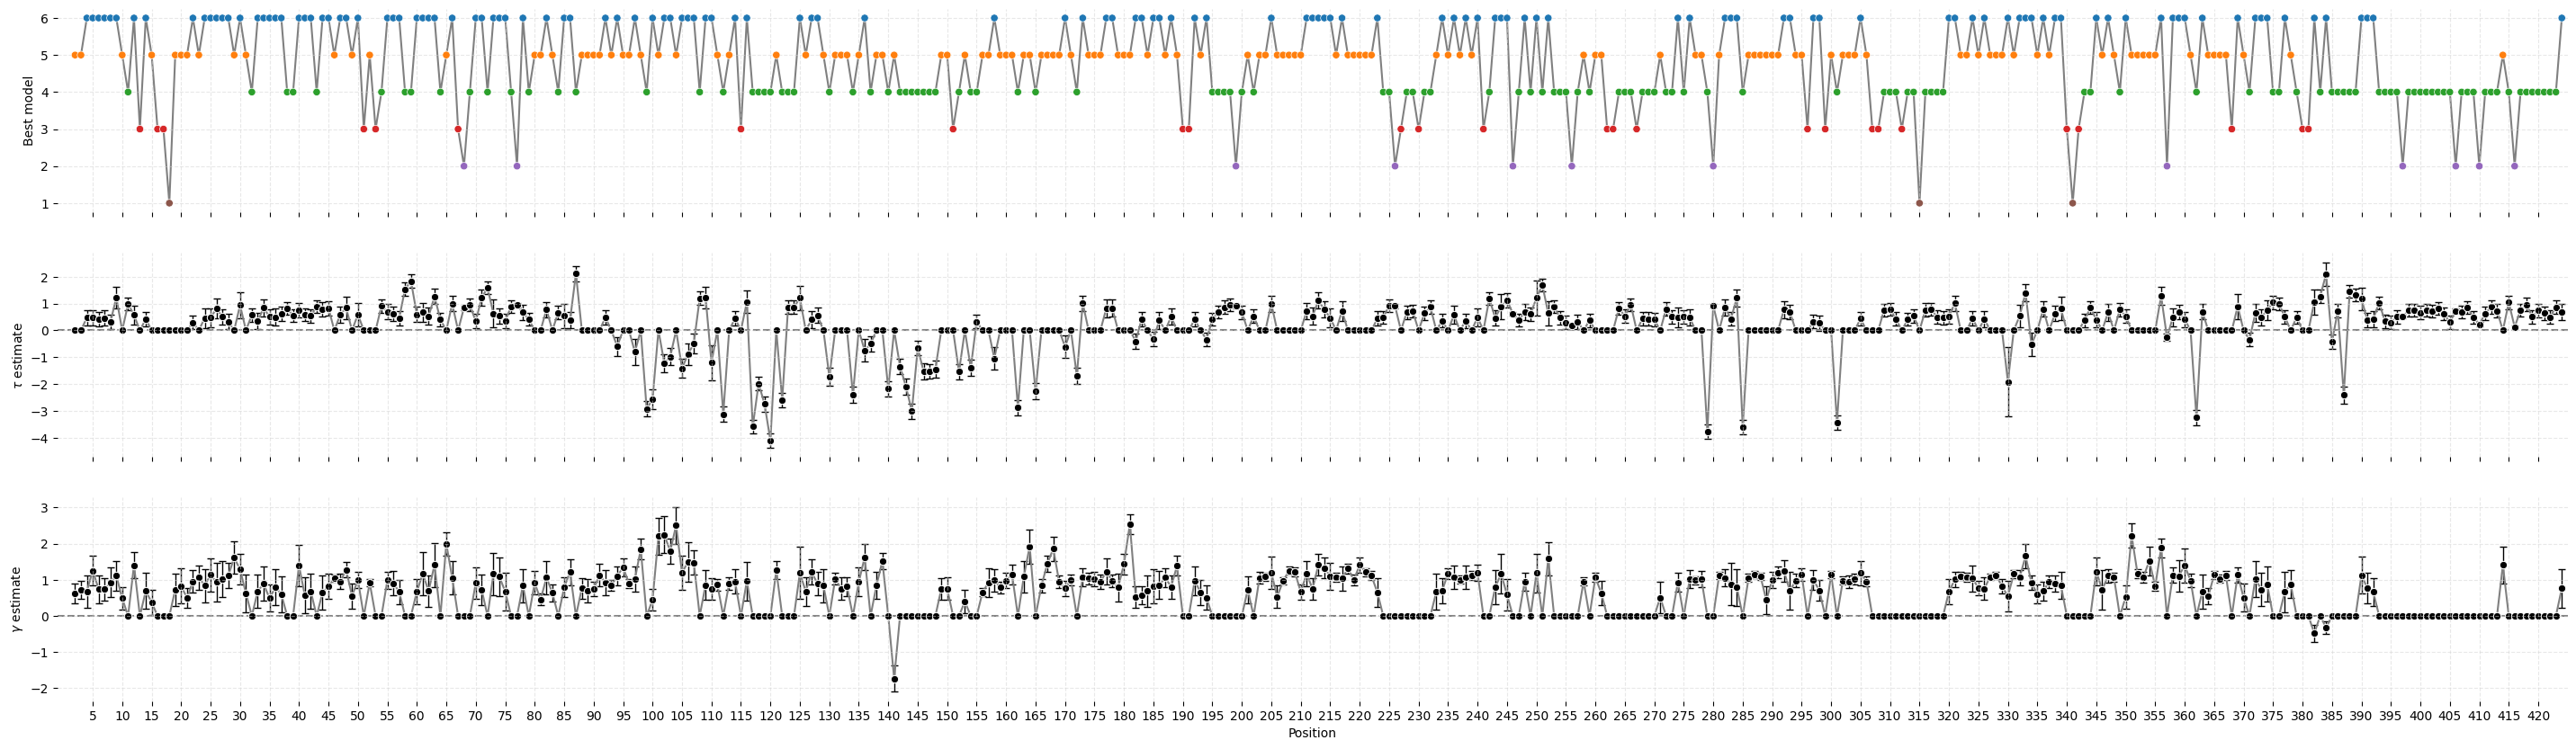

In [6]:
from cosmos.model_analyzer.plot import plot_best_models, plot_best_params
fig, axes = plt.subplots(3, 1, figsize=(36, 10), sharex=True)

_ = plot_best_models(analyzer, axes[0])
_ = plot_best_params(analyzer, "tau", axes[1])
_ = plot_best_params(analyzer, "gamma", axes[2])